# Representing Quibit States

https://qiskit.org/textbook/ch-states/representing-qubit-states.html

In quantum computers, our basic variable is the qubit: a quantum variant of the bit. These have exactly the same restrictions as normal bits do: they can store only a single binary piece of information, and can only ever give us an output of 0 or 1. However, they can also be manipulated in ways that can only be described by quantum mechanics. This gives us new gates to play with, allowing us to find new ways to design algorithms.

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from math import sqrt, pi

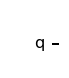

In [2]:
# In Qiskit, we use the QuantumCircuit object to store our circuits, this is essentially 
# a list of the quantum operations on our circuit and the qubits they are applied to.
# In our quantum circuits, our qubits always start out in the state |0> 
qc = QuantumCircuit(1)
qc.draw(output='mpl')

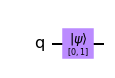

In [3]:
# We can use the initialize() method to transform this into any state. We 
# give initialize() the vector we want in the form of a list, and tell it which 
# qubit(s) we want to initialise in this state:
qc = QuantumCircuit(1)
initial_state = [0,1]  # [0,1] = |1> and [1,0] = |0>
qc.initialize(initial_state, 0)
qc.draw(output='mpl')

[0.+0.j 1.+0.j]


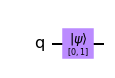

In [4]:
# We can then use one of Qiskit’s simulators to view the resulting state of our 
# qubit. To begin with we will use the statevector simulator.

# Tell Qiskit how to simulate our circuit
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = svsim.run(qobj).result() # Do the simulation and return the result

# We can then get the final statevector using
out_state = result.get_statevector()
print(out_state) # Display the output state vector
qc.draw(output='mpl')

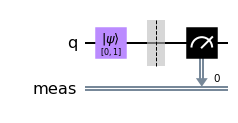

In [5]:
qc.measure_all()
qc.draw(output='mpl')

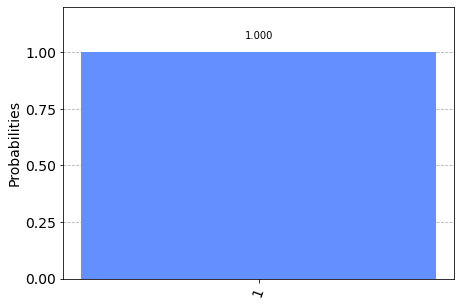

In [6]:
qobj = assemble(qc)
result = svsim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

In [7]:
initial_state = [1/sqrt(2), 1j/sqrt(2)]

qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialise the 0th qubit in the state `initial_state`

qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector() # Execute the circuit
print(state)    

[0.70710678+0.j         0.        +0.70710678j]


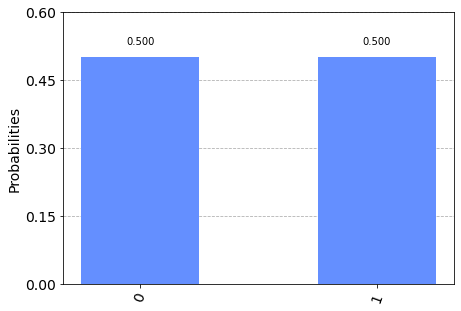

In [8]:
qobj = assemble(qc)
results = svsim.run(qobj).result().get_counts()
plot_histogram(results)

# Single QuiBit States

https://qiskit.org/textbook/ch-states/single-qubit-gates.html

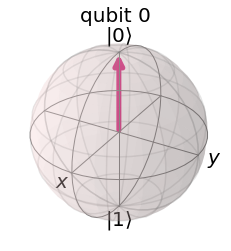

In [9]:
svsim = Aer.get_backend('statevector_simulator')

# The effect of a Pauli X-gate on a qubit
qc = QuantumCircuit(1)

qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

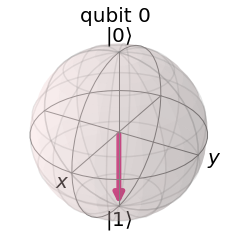

In [10]:
# The single-qubit Pauli-X gate 
qc.x(0)
qc.draw(output='mpl')
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

# What is a quantum circuit

https://qiskit.org/textbook/ch-algorithms/defining-quantum-circuits.html

A quantum circuit is a computational routine consisting of 
1. coherent quantum operations on quantum data, such as qubits, and 
2. concurrent real-time classical computation.
It is an ordered sequence of quantum gates, measurements and resets, all of which may be conditioned on and use data from the real-time classical computation.

While a universal quantum computer can do anything any classical computer can, we often add classical parts to our quantum circuits because quantum states are fragile.

# The Atoms Of Computation

In [13]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

In [14]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5)

HTML(value='<pre>Binary   Decimal\n 00000 = 0</pre>')

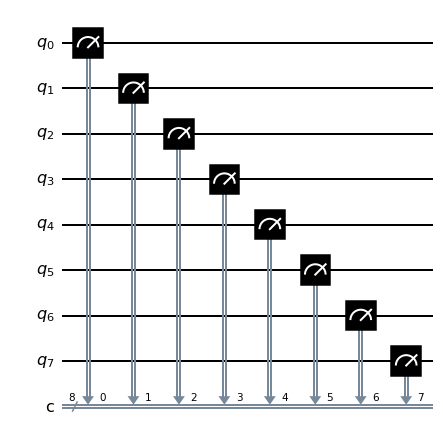

In [15]:
# Quantum circuit
n = 8
n_q = n
n_b = n

# # QuantumCircuit with n_q qubits and n_b classical bits
qc_output = QuantumCircuit(n_q, n_b)

for j in range(n):
    # Measure quantum bit into classical bit (tuples).
    qc_output.measure(qubit=j, cbit=j)

qc_output.draw(output='mpl')

In [16]:
# Aer: provides access to several simulators that are included with Qiskit and 
#     run on your local machine.
# IBMQ: implements access to cloud-based backends — simulators and real quantum devices — 
#       hosted on IBM Q.
# https://medium.com/qiskit/qiskit-backends-what-they-are-and-how-to-work-with-them-fb66b3bd0463

sim = Aer.get_backend('qasm_simulator')

# Assemble a list of circuits or pulse schedules into a ``Qobj``.
# This function serializes the payloads, which could be either circuits or schedules,
# to create ``Qobj`` "experiments". It further annotates the experiment payload with
# header and configurations.
qobj = assemble(qc_output)

# https://qiskit.org/documentation/stubs/qiskit.result.Result.html
runs = sim.run(qobj)
result = runs.result()

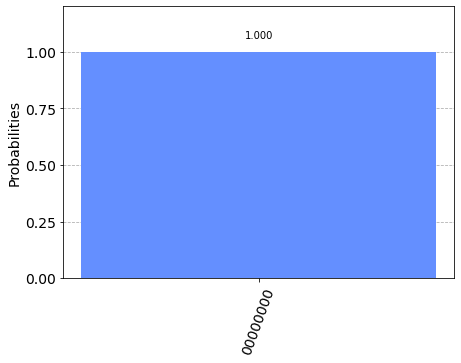

In [17]:
sim = Aer.get_backend('qasm_simulator')  # this is the simulator we'll use
qobj = assemble(qc_output)  # this 
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

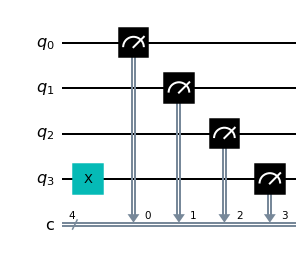

In [18]:
qc_encode = QuantumCircuit(4,4)
qc_encode.x(3)

for j in range(4):
    qc_encode.measure(j,j)
qc_encode.draw(output='mpl')

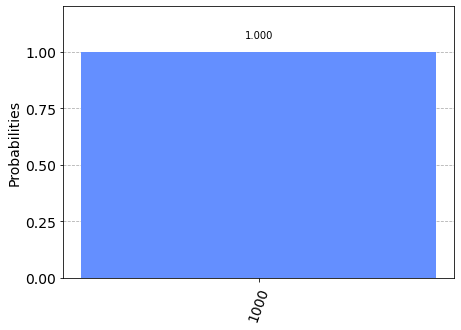

In [19]:
job = assemble(qc_encode)
run = sim.run(job).result()
counts = sim.run(job).result().get_counts()
plot_histogram(counts)

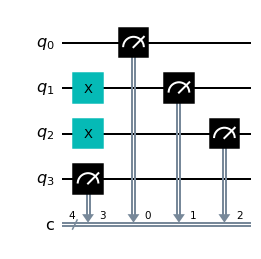

In [20]:
# Output circuit
n = 4
n_q = n
n_b = n
qc_output = QuantumCircuit(n_q,n_b)

for j in range(n):
    qc_output.measure(j,j)

# Encode circuit
qc_encode = QuantumCircuit(n)
qc_encode.x(n-3)
qc_encode.x(n-2)

qc = qc_encode + qc_output
qc.draw(output='mpl')

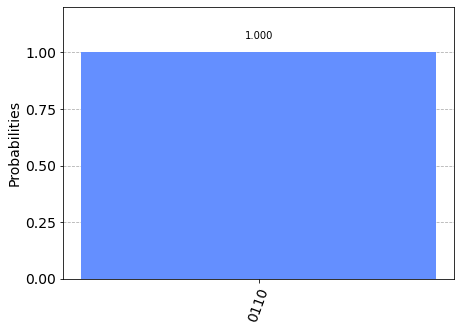

In [21]:
job = assemble(qc)
counts = sim.run(job).result().get_counts()
plot_histogram(counts)

Bra-ket notation

* https://www.cl.cam.ac.uk/teaching/1617/QuantComp/slides2.pdf

* https://www.cl.cam.ac.uk/teaching/1617/QuantComp/slides4.pdf
    

In [24]:
# Adding
# 0+0 = 00
# 0+1 = 01
# 1+0 = 01
# 1+1 = 10

# The rightmost bit in all four of these answers is completely determined by whether 
# the two bits we are adding are the same or different.
#   The same  => 0
#   Different => 1
# XOR gate <=> controlled-NOT (CNOT)

If we have two quibits, we write the state as follows:

$\psi = \psi_1 \otimes \psi_2$ 

This can be represented as a 4 dimensional vector.

The [CNOT gate](https://quantumcomputing.stackexchange.com/questions/5179/how-to-construct-matrix-of-regular-and-flipped-2-qubit-cnot) works on two quibits:

$$
CNOT = 
\begin{pmatrix}
1 & 0\\
0 & 1 
\end{pmatrix}
\otimes
\begin{pmatrix}
0 & 1\\
1 & 0 
\end{pmatrix} = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{pmatrix}
$$

Let $\psi = |0\rangle \otimes |0\rangle$. So, we want $0 + 0$.

$$
\begin{pmatrix}
1 & 0\\
0 & 1 
\end{pmatrix}
\otimes
\begin{pmatrix}
0 & 1\\
1 & 0 
\end{pmatrix} |0\rangle \otimes |0\rangle = 
\begin{pmatrix}
1 & 0\\
0 & 1 
\end{pmatrix}
\otimes
\begin{pmatrix}
0 & 1\\
1 & 0 
\end{pmatrix} 
\begin{pmatrix}
1  \\
0  \\
1  \\
0  \\
\end{pmatrix}
$$